In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [15]:
# Lets import yfinance as yf and create a ticker object for a Tesla stock.

import yfinance as yf

TSLA= yf.Ticker("TSLA")


TSLA

yfinance.Ticker object <TSLA>

In [16]:
# Lets pull daily stock prices for Tesla(TSLA)

data = yf.download("TSLA", start="2019-01-01", end="2022-04-30", interval="1d")

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,67.557999,67.842003,65.052002,66.559998,66.559998,31511500
2019-01-02,61.220001,63.026001,59.759998,62.023998,62.023998,58293000
2019-01-03,61.400002,61.880001,59.476002,60.071999,60.071999,34826000
2019-01-04,61.200001,63.599998,60.546001,63.537998,63.537998,36970500
2019-01-07,64.344002,67.348000,63.549999,66.991997,66.991997,37756000
...,...,...,...,...,...,...
2022-04-22,1014.909973,1034.849976,994.000000,1005.049988,1005.049988,23232200
2022-04-25,978.969971,1008.619995,975.299988,998.020020,998.020020,22780400
2022-04-26,995.429993,1000.000000,875.000000,876.419983,876.419983,45377900


In [10]:
# Let's get price to earnings ratio

TSLA = yf.Ticker("TSLA")
TSLA.info['forwardPE']

44.69836

In [5]:
# Current volume

TSLA.info["volume"]

28883854

In [6]:
# Average volume over the last 24 hours:

TSLA.info["averageVolume"]

26687481

In [5]:
# Let's get the weekly highs and lows for Tesla

data = yf.download("TSLA", period="max", interval="1wk")

data


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-28,3.800000,6.084000,3.508000,3.840000,3.840000,246560000.0
2010-07-05,4.000000,4.000000,2.996000,3.480000,3.480000,127753000.0
2010-07-12,3.590000,4.300000,3.380000,4.128000,4.128000,77194500.0
2010-07-19,4.274000,4.450000,3.900000,4.258000,4.258000,35878500.0
2010-07-26,4.300000,4.300000,3.910000,3.988000,3.988000,15260000.0
...,...,...,...,...,...,...
2022-04-25,978.969971,1008.619995,821.700012,870.760010,870.760010,164773300.0
2022-05-02,860.770020,955.500000,843.109985,865.650024,865.650024,128815400.0
2022-05-09,836.450012,845.630005,680.000000,769.590027,769.590027,168235000.0


In [10]:
#Let’s check out the moving average for stocks over a 10, 20 and 50 day period of time. We’ll add that information to the stock’s dataframe.


ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name] = data['Adj Close'].rolling(window=ma,center=False).mean()

data.tail()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2022-04-25,978.969971,1008.619995,821.700012,870.760010,870.760010,164773300.0,933.042993,944.694995,853.217000
2022-05-02,860.770020,955.500000,843.109985,865.650024,865.650024,128815400.0,938.620996,941.348996,858.912400
2022-05-09,836.450012,845.630005,680.000000,769.590027,769.590027,168235000.0,931.751001,926.478497,861.799801
2022-05-16,767.159973,769.760010,700.809998,709.809998,709.809998,84558800.0,923.197003,909.129996,864.015001
2022-05-18,744.520020,760.500000,700.809998,709.809998,709.809998,28883854.0,903.639001,893.272498,866.013401


<AxesSubplot:xlabel='Date'>

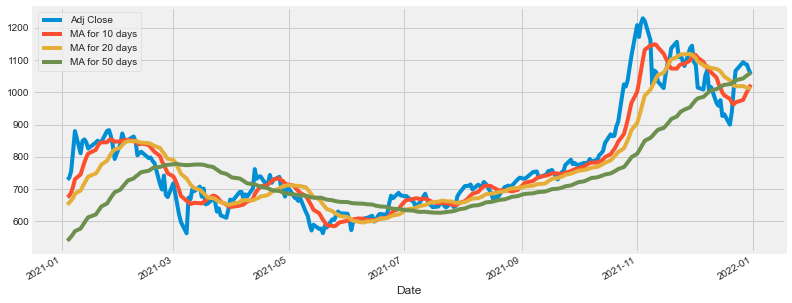

In [8]:
#Let’s plot the same, again using only last year i.e. 2021 data.


data.truncate(before='2021-01-01', after='2022-01-01')[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))

<AxesSubplot:xlabel='Date'>

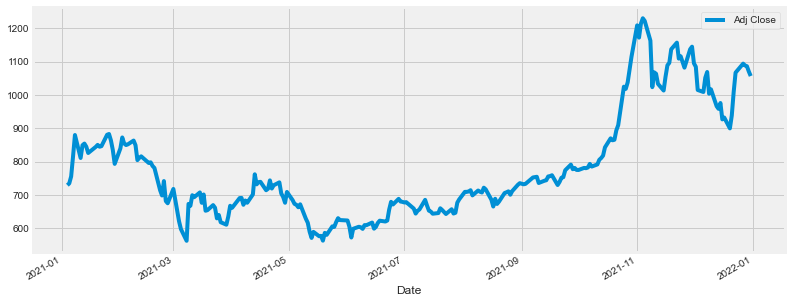

In [14]:
# Plotting the stock's adjusted closing price using pandas


data.truncate(before='2021-01-01', after='2022-01-01')['Adj Close'].plot(legend=True,figsize=(12,5))

<AxesSubplot:xlabel='Date'>

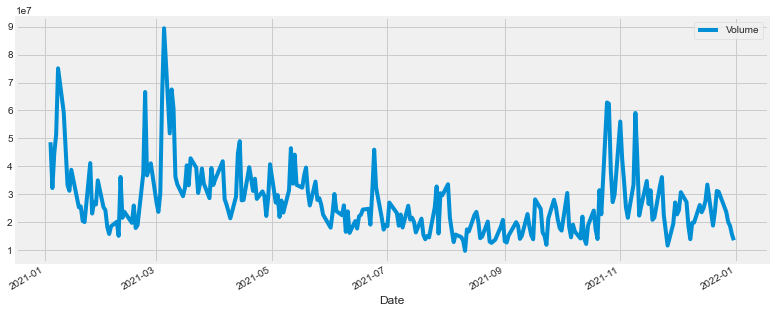

In [16]:
# Plotting the total volume being traded over time

data.truncate(before='2021-01-01', after='2022-01-01')['Volume'].plot(legend=True,figsize=(12,5))

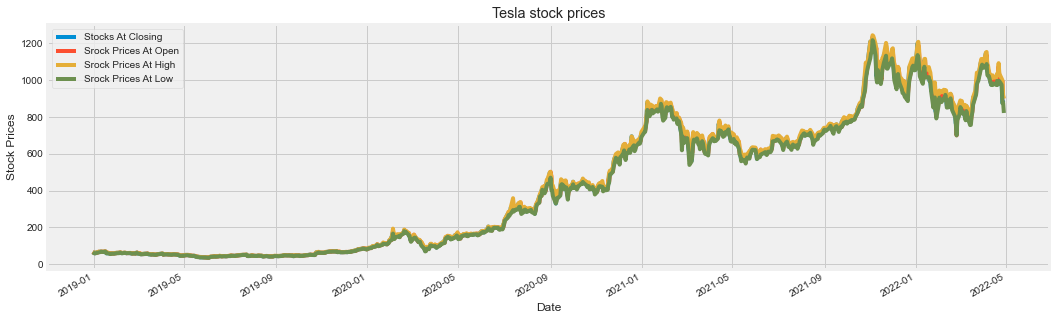

In [17]:
data['Close'].plot(label= 'Stocks At Closing', figsize=(16,5))
data['Open'].plot(label='Srock Prices At Open')
data['High'].plot(label='Srock Prices At High')
data['Low'].plot(label='Srock Prices At Low')
plt.legend()
plt.title('Tesla stock prices')
plt.ylabel('Stock Prices')
plt.show()


